# **Detection of Covid19 Cases using Supervised Machine Learning**

In [1]:
%%HTML

<html>
    <body>
        <iframe src = "https://atharv-chaudhari.github.io/Project-Covid-NLP/" height = "650px" width = "100%">
        </iframe>
    </body>
</html>

# [Data Source](https://data.gov.il/dataset/covid-19/resource/d337959a-020a-4ed3-84f7-fca182292308)

# [Extracted Data Code Used for this Project](https://www.kaggle.com/mykeysid10/israel-covid-19-data-extraction#Dataset-Link) 

# Loading Required Libraries 

In [2]:
# Data Preprocessing

import numpy as np
import pandas as pd

# Data Analysis

import plotly.express as px
import missingno as msno

# Feature Selection

import scipy.stats as stats
from scipy.stats import chi2_contingency

# Data Modeling

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation & saving the model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score
import pickle

# Reading The Data

In [3]:
# Loading the Data

data = pd.read_csv("../input/covid19-dataset-for-year-2020/covid_data_2020-2021.csv")
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
1,2021-10-11,0,0,0,0,0,Negative,Yes,male,Other
2,2021-10-11,0,0,0,0,0,Negative,No,female,Other
3,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
4,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861480 entries, 0 to 5861479
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 447.2+ MB


> #### Dataset has 5861480 records and 10 features.

> #### This is a Binary Classification Problem. 

In [5]:
# Checking the levels for categorical features

def show(data):
  for i in data.columns[1:]:
    print("Feature: {} with {} Levels".format(i,data[i].unique()))

show(data)

Feature: cough with [0 1] Levels
Feature: fever with [0 1] Levels
Feature: sore_throat with [0 1] Levels
Feature: shortness_of_breath with [0 1] Levels
Feature: head_ache with [0 1] Levels
Feature: corona_result with ['Negative' 'Positive'] Levels
Feature: age_60_and_above with ['Yes' 'No'] Levels
Feature: gender with ['female' 'male'] Levels
Feature: test_indication with ['Other' 'Contact with confirmed' 'Abroad'] Levels


> #### Target Feature is Corona_result.

> #### Data is completely Categorical except test_date feature.

# Exploratory Data Analysis using Tableau

In [6]:
data.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

> #### There are no missing values in the data.

In [7]:
%%HTML

<div class='tableauPlaceholder' id='viz1639243913844' style='position: relative'>
    <object class='tableauViz'  style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
        <param name='embed_code_version' value='3' /> 
        <param name='site_root' value='' />
        <param name='name' value='IsraelCovidDataAnalysis_16391222654010&#47;Covid19Dashboard' />
        <param name='tabs' value='no' />
        <param name='toolbar' value='yes' />
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-US' />
    </object>
</div>                

<script type='text/javascript'>                    
    var divElement = document.getElementById('viz1639243913844');                    
    var vizElement = divElement.getElementsByTagName('object')[0];                    
    if ( divElement.offsetWidth > 800 ) { 
        vizElement.style.width='100%';
        vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
    } 
    else if ( divElement.offsetWidth > 500 ) { 
        vizElement.style.width='100%';
        vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
    } 
    else { 
        vizElement.style.width='100%';
        vizElement.style.height='2327px';
    }                     
    var scriptElement = document.createElement('script');                    
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
    vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

> #### A Tableau Dashboard consisting the EDA of data. 

> #### Use the filters and check the graphs for specified filters.

> #### [Tableau Dashboard Link](https://public.tableau.com/views/IsraelCovidDataAnalysis_16391222654010/Covid19Dashboard?:language=en-US&:display_count=n&:origin=viz_share_link)

![](https://raw.githubusercontent.com/Atharv-Chaudhari/Project-Covid-NLP/main/Project%20Covid%20Images/Tableau.jpeg)

# Encoding The Features

In [8]:
# Label Encoding

data['corona_result'] = data['corona_result'].map({'Negative': 0, 'Positive': 1})
data['gender'] = data['gender'].map({'female': 0, 'male': 1})
data['age_60_and_above'] = data['age_60_and_above'].map({'No': 0, 'Yes': 1})

# One Hot Encoding 

data['test_indication'] = data['test_indication'].map({'Abroad': 'abroad', 'Contact with confirmed': 'contact_with_covid_positive_patient', 'Other': 'other'})
data = pd.get_dummies(data, columns = ['test_indication'])

In [9]:
# Renaming the encoded feature names & dropping test_indication_other & test_date feature

data.rename({'test_indication_abroad': 'abroad',
             'test_indication_contact_with_covid_positive_patient': 'contact_with_covid_positive_patient'},
             axis='columns', inplace = True)

data.drop(['test_date','test_indication_other'], axis = 1, inplace = True)
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,abroad,contact_with_covid_positive_patient
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


> #### Dropped test_indication = other because it is not specified what other means in this [PDF](https://github.com/Atharv-Chaudhari/Sem-7-Covid/blob/main/Phase-1-ML/Dataset%20Description.pdf).

> #### Dropped test_date because our objective is to detect if a patient is Covid Positive or Negative based on Symptoms, Gender, Age & Test Indications.

In [10]:
# Correlation Map

fig = px.imshow(data.corr(), color_continuous_scale = 'rainbow_r')
fig.show()

> #### We observe that none of the features are highly co-related. 

# Feature Extraction 

> #### We will be extracting Risk coefficient from the data.

In [11]:
# Creating feature risk coeficient

data['risk_coef'] = data['cough']*0.1 + data['fever']*0.2 + data['sore_throat']*0.1 + data['shortness_of_breath']*0.1 + data['head_ache']*0.1 + data['age_60_and_above']*0.1 + data['abroad']*0.1 + data['contact_with_covid_positive_patient']*0.2
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,abroad,contact_with_covid_positive_patient,risk_coef
0,0,0,0,0,0,0,1,0,0,0,0.1
1,0,0,0,0,0,0,1,1,0,0,0.1
2,0,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,1,0,0,0,0.1
4,0,0,0,0,0,0,1,0,0,0,0.1


> #### To calculate risk_coeficient, we have given the weights for features based on the following links -

> #### [Ref-1](https://www.mayoclinic.org/diseases-conditions/coronavirus/symptoms-causes/syc-20479963) 

> #### [Ref-2](https://www.cidrap.umn.edu/news-perspective/2021/07/israeli-study-finds-26-covid-breakthrough-infection-rate) 

> #### [Ref-3](https://www.gov.il/en/departments/faq/faq-coronavirus#groupcollapseItem1collapseItem5) 

> #### [Ref-4](https://www.gov.il/en/Departments/General/corona-confirmed-cases) 

> #### [Ref-5](https://www.sciencedirect.com/science/article/pii/S1198743X21000835) 

> #### We observed that fever was the most common symptom found among covid positive patients (Links + EDA Dashboard) so we gave 0.2 weight for it.

> #### Contact with covid patient would directly lead to home quarantine so we gave 0.2 weight for it.

> #### Remaining symptoms & Age 60+ features got 0.1 weight.

In [12]:
# Removing all records with risk_coef >= 0.6 and corona_result = 0 and risk_coef <= 0.3 and corona_result = 1

i1 = data[(data['risk_coef'] >= 0.6) & (data['corona_result'] == 0)].index
i2 = data[(data['risk_coef'] <= 0.3) & (data['corona_result'] == 1)].index
data.drop(i1, inplace = True)
data.drop(i2, inplace = True)

# Dropping risk coeficient

data.drop(['risk_coef'], axis = 1, inplace = True)

> #### Removed Contradictory records using risk coeficient. And the use of risk coeficient is over.

In [13]:
data = data.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5499031 entries, 0 to 5861479
Data columns (total 10 columns):
 #   Column                               Dtype
---  ------                               -----
 0   cough                                int64
 1   fever                                int64
 2   sore_throat                          int64
 3   shortness_of_breath                  int64
 4   head_ache                            int64
 5   corona_result                        int64
 6   age_60_and_above                     int64
 7   gender                               int64
 8   abroad                               int64
 9   contact_with_covid_positive_patient  int64
dtypes: int64(10)
memory usage: 461.5 MB


> #### Datatype for all features is converted to integer.

# [Undersampling the Data](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)

In [14]:
# Analyzing Target Feature

df = pd.DataFrame()
df['corona_result'] = ['Negative','Positive']
df['count'] = [len(data[data['corona_result'] == 0]), len(data[data['corona_result'] == 1])]
df = df.sort_values(by = ['count'], ascending = False)
fig = px.bar(df, x = 'corona_result', y = 'count', 
             color = "corona_result", width = 600, 
             color_discrete_sequence = ["orange", "purple"],
             template = 'plotly_dark')

fig.show()

In [15]:
data['corona_result'].value_counts()

0    5337010
1     162021
Name: corona_result, dtype: int64

> #### Covid Positive Cases - 162021, Covid Negative Cases - 5337010

#### We decided to do Undersampling instead of Oversampling because -

> #### 1. Data is abundent for Negative Cases.

> #### 2. Increasing Positive Cases by oversampling would be an issue according to real world scenario.

![](https://raw.githubusercontent.com/Atharv-Chaudhari/Project-Covid-NLP/main/Project%20Covid%20Images/Carnage.jpg)

In [16]:
x = data.drop(columns = ['corona_result'], axis = 1) # Independent Features
y = data['corona_result'] # Target Feature

In [17]:
# Undersampling Covid Negative Cases (Setting n(+ve cases) = 0.6 * n(-ve cases))

under = RandomUnderSampler(sampling_strategy = 0.6, random_state = 42)
os_x, os_y = under.fit_resample(x, y)

In [18]:
# Analyzing Target Feature after undersampling

df = pd.DataFrame()
df['Corona_result'] = ['Negative','Positive']
df['Count'] = [len(os_y[os_y == 0]), len(os_y[os_y == 1])]
df = df.sort_values(by = ['Count'], ascending = False)
fig = px.bar(df, x = 'Corona_result', y = 'Count', 
             color = "Corona_result", width = 600,
             color_discrete_sequence = ["orange", "purple"],
             template = 'plotly_dark')

fig.show()

In [19]:
os_x.head(3)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,abroad,contact_with_covid_positive_patient
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,1,0,0


In [20]:
os_y.value_counts()

0    270035
1    162021
Name: corona_result, dtype: int64

> #### We observe that the data is now balanced. 

> #### Covid Positive Cases - 162021, Covid Negative Cases - 270035

# Feature Selection

### Anova Test

Feature cough: 192608.2258928771
Feature fever: 220284.88679801146
Feature sore_throat: 68068.08027512691
Feature shortness_of_breath: 18068.67505125996
Feature head_ache: 183361.56080913165
Feature age_60_and_above: 5206.646303572826
Feature gender: 260.8806203365523
Feature abroad: 140.97884184356178
Feature contact_with_covid_positive_patient: 463452.3432929935


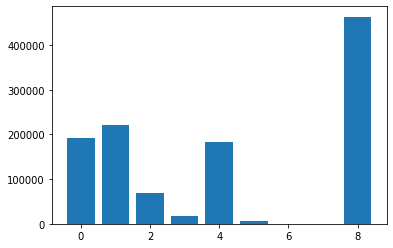

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(os_x, os_y)

l = list(os_x.columns)

for i in range(len(fs.scores_)):
    print('Feature {}: {}'.format(l[i], fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Chi Square Test

![](https://raw.githubusercontent.com/Atharv-Chaudhari/Project-Covid-NLP/main/Project%20Covid%20Images/Hulk.jpg)

In [22]:
imp_var = []
h = dict()
u = dict()
unimp_var = []

# Creating a class for Chi Square Test

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None 
        self.chi2 = None 
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None
    
    # Checking for level of significance 
    
    def _print_chisquare_result(self, colX, alpha):
        if self.p < alpha:
          h[colX] = self.p
        else:
          unimp_var.append(colX)
          u[colX] = self.p
            
    def TestIndependence(self, colX, colY, alpha = 0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y, X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns = self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)

In [23]:
temp = os_x
temp['corona_result'] = os_y

In [24]:
cT = ChiSquare(temp)
testColumns = temp.drop(columns = ['corona_result']).columns

# Checking for all features whether they contribute in detecting covid cases or not

for var in testColumns:
    cT.TestIndependence(colX = var, colY = "corona_result")  

# Creating a DataFrame to bifurcate Important & Unimportant Features Classified by Chi Square Test

imp = pd.DataFrame()

m = sorted(h.items(), key = lambda x: x[1], reverse = False)

for i in range(len(m)):
  imp_var.append(m[i][0])

if(len(imp_var) > len(unimp_var)):
  for i in range(len(imp_var) - len(unimp_var)):
    unimp_var.append("")
else:
  for i in range(len(unimp_var) - len(imp_var)):
    imp_var.append("")
    
imp['Important Variables'] = imp_var
imp['Unimportant Variables'] = unimp_var

imp

,Important Variables,Unimportant Variables
0,cough,
1,fever,
2,sore_throat,
3,shortness_of_breath,
4,head_ache,
5,age_60_and_above,
6,contact_with_covid_positive_patient,
7,gender,
8,abroad,


> #### No feature seems unimportant. 

> #### All the features are contributing towards the detection of covid cases.

# Data Modeling

### Train Test Split 

In [25]:
os_x = os_x.drop(['corona_result'], axis = 1)
os_x.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,abroad,contact_with_covid_positive_patient
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0


In [26]:
# Setting Train:Test ratio as 70:30

X_train, X_test, Y_train, Y_test = train_test_split(os_x, os_y, test_size = 0.3, random_state = 42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print()
print(Y_train.value_counts())
print()
print(Y_test.value_counts())

(302439, 9) (129617, 9) (302439,) (129617,)

0    188938
1    113501
Name: corona_result, dtype: int64

0    81097
1    48520
Name: corona_result, dtype: int64


### [Evaluation Metrics](https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/)

> ![](https://raw.githubusercontent.com/Atharv-Chaudhari/Project-Covid-NLP/main/Project%20Covid%20Images/Confusion%20Matrix.jpg)

> #### We will be using 5 metrics to evaluate our Models.

> #### Metrics - Recall, Specificity, Accuracy, Precision & F1 Score.

In [27]:
# Function for Model Evaluation

def evaluation_parametrics(name, y_train, yp_train, y_test, yp_test):
    
    print("\n-----------------------------{}-----------------------------\n".format(name))
    
    cm_train = confusion_matrix(y_train, yp_train)
    t1 = ConfusionMatrixDisplay(cm_train)
    s1 = round((cm_train[0,0]/(cm_train[0,0] + cm_train[0,1])),4)
    
    print("Classification Report for Train Data\n")
    print(classification_report(y_train, yp_train)) 
    print("--------------------------------------------------------------------------")
    print("Recall on Train Data: ", round(recall_score(y_train, yp_train),4))
    print("Specificity on Train Data: ", s1)
    print("Accuracy on Train Data: ", round(accuracy_score(y_train, yp_train),4))
    print("Precision on Train Data: ", round(precision_score(y_train, yp_train),4))
    print("F1 Score on Train Data: ", round(f1_score(y_train, yp_train),4))
    print("--------------------------------------------------------------------------")
          
    cm_test = confusion_matrix(y_test, yp_test)
    t2 = ConfusionMatrixDisplay(cm_test)
    s2 = round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4)
    
    print("\nClassification Report for Test Data\n")
    print(classification_report(y_test, yp_test))   
    print("--------------------------------------------------------------------------")
    print("Recall on Test Data: ", round(recall_score(y_test, yp_test), 4))
    print("Specificity on Test Data: ", s2)
    print("Accuracy on Test Data: ", round(accuracy_score(y_test, yp_test), 4))
    print("Precision on Test Data: ", round(precision_score(y_test, yp_test), 4))
    print("F1 Score Test Data: ", round(f1_score(y_test, yp_test), 4))
    print("--------------------------------------------------------------------------")
    
    t1.plot()
    t2.plot()

### Feature Importance Graph

In [28]:
# Function for feature importance graph 

def feature_importance(df):
    
    df = df.sort_values(by = ['Variable Importance Score'], ascending = False)
    fig = px.bar(df, x = 'Features', y = 'Variable Importance Score', 
                 color = "Features", 
                 color_discrete_sequence = px.colors.sequential.Plasma_r, 
                 template ='plotly_dark')

    fig.show()

### M1 - Logistic Regression using GridSearchCv

In [29]:
grid1 = {"C": np.logspace(-3,3,7), "penalty": ["l1","l2"]}

lr = LogisticRegression(solver = "saga")
lr_cv = GridSearchCV(lr, grid1, cv = 3)
lr_cv.fit(X_train, Y_train)

print("Best Parameters: ", lr_cv.best_params_)
print("Accuracy: ",lr_cv.best_score_)

Best Parameters:  {'C': 1.0, 'penalty': 'l1'}
Accuracy:  0.9769540303995186



-----------------------------Logistic Regression Classifier-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    188938
           1       0.94      1.00      0.97    113501

    accuracy                           0.98    302439
   macro avg       0.97      0.98      0.98    302439
weighted avg       0.98      0.98      0.98    302439

--------------------------------------------------------------------------
Recall on Train Data:  0.9984
Specificity on Train Data:  0.964
Accuracy on Train Data:  0.9769
Precision on Train Data:  0.9434
F1 Score on Train Data:  0.9701
--------------------------------------------------------------------------

Classification Report for Test Data

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     81097
           1       0.94      1.00      0.97     48520

    accuracy                   

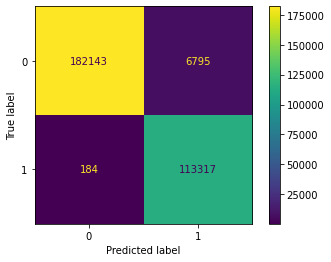

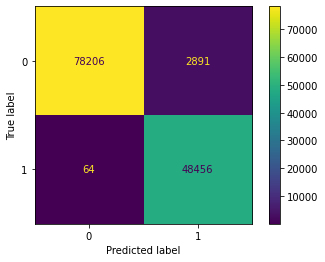

In [30]:
# Applying Best Parameters Suggested by GridSearch

lr = LogisticRegression(C = 1.0, penalty = 'l1', solver = "saga")

lr.fit(X_train, Y_train)

lr_yp_train = lr.predict(X_train)
lr_yp_test = lr.predict(X_test)

# Model Evaluation

evaluation_parametrics("Logistic Regression Classifier", Y_train, lr_yp_train, Y_test, lr_yp_test)

In [31]:
# Checking For Variable Importance

d1 = pd.DataFrame({'Features': list(X_train.columns), 'Variable Importance Score': list(np.around(lr.coef_[0],3))})
d1 = d1.sort_values(by = ['Variable Importance Score'], ascending = False)

feature_importance(d1)

![](https://raw.githubusercontent.com/Atharv-Chaudhari/Project-Covid-NLP/main/Project%20Covid%20Images/All%20Day.jpg)

### M2 - Random Forest using GridSearchCv

In [32]:
grid2 = {'n_estimators': [200, 300], 'max_depth': [5,6,7,8], 'criterion': ['gini', 'entropy']}

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf, grid2, cv = 3)
rf_cv.fit(X_train, Y_train)

print("Best Parameters: ", rf_cv.best_params_)
print("Accuracy: ", rf_cv.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}
Accuracy:  0.9772945949431125



-----------------------------Random Forest Classifier-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    188938
           1       0.94      1.00      0.97    113501

    accuracy                           0.98    302439
   macro avg       0.97      0.98      0.98    302439
weighted avg       0.98      0.98      0.98    302439

--------------------------------------------------------------------------
Recall on Train Data:  0.9998
Specificity on Train Data:  0.9639
Accuracy on Train Data:  0.9773
Precision on Train Data:  0.9432
F1 Score on Train Data:  0.9707
--------------------------------------------------------------------------

Classification Report for Test Data

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     81097
           1       0.94      1.00      0.97     48520

    accuracy                        

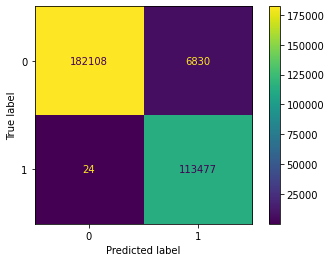

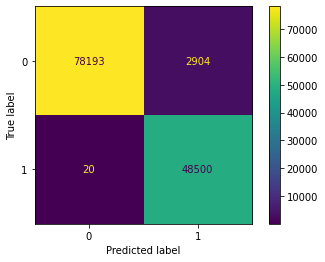

In [33]:
# Applying Best Parameters Suggested by GridSearch

rf = RandomForestClassifier(n_estimators = 200, max_depth = 8, criterion = 'gini', random_state = 42) 

rf.fit(X_train ,Y_train)

rf_yp_train = rf.predict(X_train)
rf_yp_test = rf.predict(X_test)

# Model Evaluation

evaluation_parametrics("Random Forest Classifier", Y_train, rf_yp_train, Y_test, rf_yp_test)

In [34]:
# Checking For Variable Importance

d2 = pd.DataFrame({'Features': list(X_train.columns), 'Variable Importance Score': list(np.around(rf.feature_importances_,3))})

feature_importance(d2)

### M3 - XGBoost using GridSearchCv

In [35]:
grid3 = {'gamma': [0.5, 1, 2], 'eta': [0.1, 0.2], 'n_estimators': [200, 300], 'max_depth': [5, 7, 8]}

xgb = XGBClassifier(objective = 'binary:logistic', eval_metric = "logloss", random_state = 42, use_label_encoder = False)
xgb_cv = GridSearchCV(xgb, grid3, cv = 3)
xgb_cv.fit(X_train, Y_train)

print("Best Estimators: ", xgb_cv.best_estimator_)
print("Best Parameters: ", xgb_cv.best_params_)
print("Accuracy: ", xgb_cv.best_score_)

Best Estimators:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, eval_metric='logloss', gamma=0.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)
Best Parameters:  {'eta': 0.2, 'gamma': 0.5, 'max_depth': 5, 'n_estimators': 200}
Accuracy:  0.977304514298751



-----------------------------XgBoost Classifier-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    188938
           1       0.94      1.00      0.97    113501

    accuracy                           0.98    302439
   macro avg       0.97      0.98      0.98    302439
weighted avg       0.98      0.98      0.98    302439

--------------------------------------------------------------------------
Recall on Train Data:  0.9994
Specificity on Train Data:  0.9641
Accuracy on Train Data:  0.9773
Precision on Train Data:  0.9435
F1 Score on Train Data:  0.9707
--------------------------------------------------------------------------

Classification Report for Test Data

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     81097
           1       0.94      1.00      0.97     48520

    accuracy                           0.9

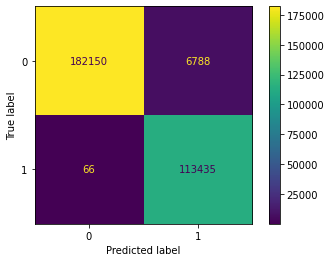

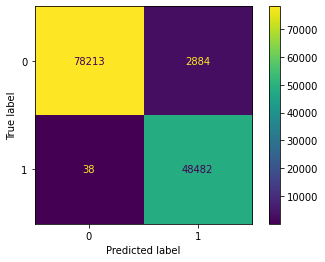

In [36]:
# Applying Best Parameters Suggested by GridSearch

xgb = XGBClassifier(eta = 0.2, gamma = 0.5, max_depth = 5, 
                    n_estimators = 200, objective = 'binary:logistic', 
                    eval_metric = "logloss", use_label_encoder = False, random_state = 42)

xgb.fit(X_train ,Y_train)

xgb_yp_train = xgb.predict(X_train)
xgb_yp_test = xgb.predict(X_test)

# Model Evaluation

evaluation_parametrics("XgBoost Classifier", Y_train, xgb_yp_train, Y_test, xgb_yp_test)

In [37]:
# Checking For Variable Importance

d3 = pd.DataFrame({'Features': list(X_train.columns), 'Variable Importance Score': list(np.around(xgb.feature_importances_,3))})

feature_importance(d3)

# Conclusion

> #### 1. Data Extraction - Converted the data from Israel Language to English.

> #### 2. Data Preprocessing - Label, One Hot Encoding & Eliminated ambigious records using risk coeficient.

> #### 3. Exploratory Data Analysis - Used Tableau & Plotly.

> #### 4. Feature Selection - Applied Chi Square test. All features were classified as important.

> #### 5. Data Modeling - Undersampling Majority Class & 70-30 split as Train - Test Split. Applied GridSearchCv for all 3 models.  

> #### 6. Model Evaluation - Calculated all the metrics using Confusion Matrix.

> ![](https://raw.githubusercontent.com/Atharv-Chaudhari/Project-Covid-NLP/main/Project%20Covid%20Images/Models%20Output.JPG)

# Saving all the models

In [38]:
pickle.dump(lr, open('lr_model.sav', 'wb'))
pickle.dump(rf, open('rf_model.sav', 'wb'))
pickle.dump(xgb, open('xgb_model.sav', 'wb'))

# Do upvote if you find this Notebook useful... 😃 